Pacotes para Utilizar

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importando os dados para apreciação.

In [84]:
df = pd.read_csv("salario_profissionais_dados.csv")
df.head(8)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8
5,2023,United States of America,Americas,SE,Applied Scientist,222200,US,US,L,6
6,2023,United States of America,Americas,SE,Applied Scientist,136000,US,US,L,6
7,2023,Canada,Americas,SE,Data Scientist,219000,CA,CA,M,6


In [85]:
numericas = df.select_dtypes(include=['number']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

Analisando o estado dos dados para se preparar para realizar as análises.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [87]:
df.dtypes

work_year               int64
country                object
region                 object
experience_level       object
job_title              object
salary_in_usd           int64
employee_residence     object
company_location       object
company_size           object
years_of_experience     int64
dtype: object

In [88]:
df.shape

(3755, 10)

In [89]:
df.describe()

,work_year,salary_in_usd,years_of_experience
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,5.970972
std,0.691448,63055.625278,2.062673
min,2020.000000,5132.000000,1.000000
25%,2022.000000,95000.000000,5.000000
50%,2022.000000,135000.000000,6.000000
75%,2023.000000,175000.000000,8.000000
max,2023.000000,450000.000000,10.000000



Procurando valores nulos (embora esta informação já tenha ficado clara na primeira análise, apenas para simples conferência de domínio dos comandos)

In [90]:
df.isnull().sum()

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

In [91]:
df.nunique()

work_year                 4
country                  78
region                    5
experience_level          4
job_title                93
salary_in_usd          1035
employee_residence       78
company_location         72
company_size              3
years_of_experience      10
dtype: int64

Calculando frequencia dos dados categóricos

In [92]:
categocon = {}  # Dicionário vazio
for coluna in categoricas:
    categocon[coluna] = df[coluna].value_counts()

# Testando aqui se funcionou:
for i in categoricas:
    print(categocon[i].head(5))
    print()

country
United States of America                                3004
United Kingdom of Great Britain and Northern Ireland     167
Canada                                                    85
Spain                                                     80
India                                                     71
Name: count, dtype: int64

region
Americas    3140
Europe       464
Asia         120
Africa        17
Oceania       14
Name: count, dtype: int64

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: count, dtype: int64

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
Name: count, dtype: int64

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
Name: count, dtype: int64

company_size
M    3153
L     454
S     148
Nam

Visualizando graficos da frequencia dos dados

In [93]:
freqcountry = df['country'].value_counts()
freqjobtitle = df['job_title'].value_counts()
freqexplvl = df['experience_level'].value_counts()
freqregion = df['region'].value_counts()

Text(0, 0.5, 'Frequências')

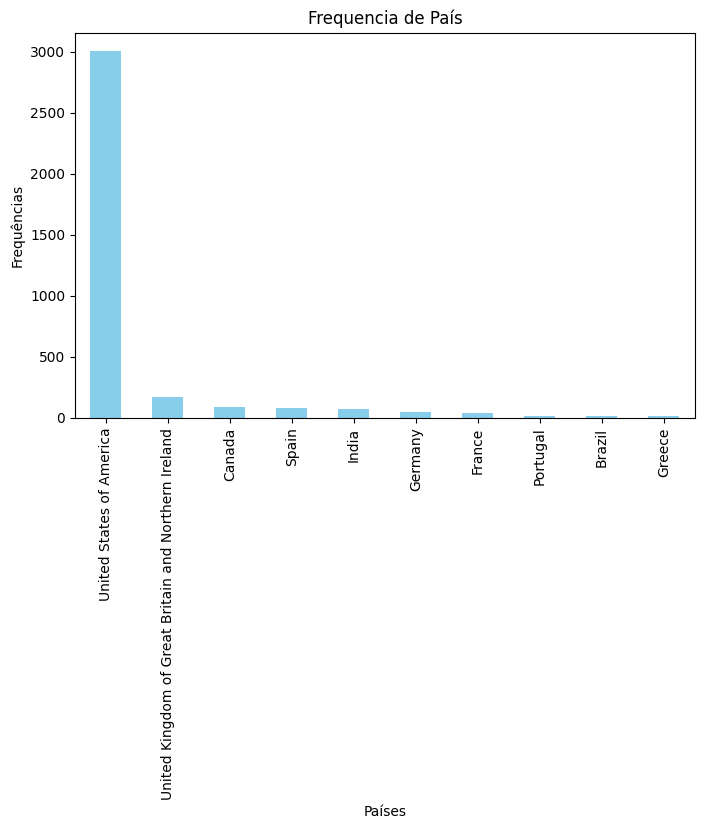

In [123]:
plt.figure(figsize=(8,5))
freqcountry.head(10).plot(kind='bar', color='skyblue')
plt.title('Frequencia de País')
plt.xlabel('Países')
plt.ylabel('Frequências')

Text(0, 0.5, 'Frequências')

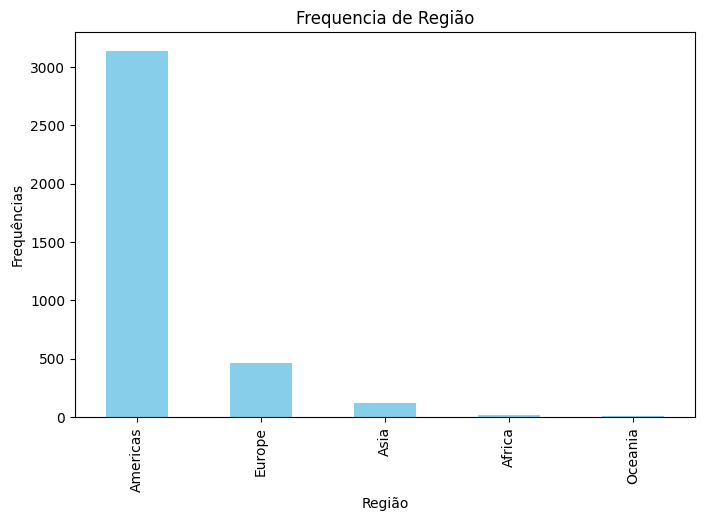

In [95]:
plt.figure(figsize=(8,5))
freqregion.plot(kind='bar', color='skyblue')
plt.title('Frequencia de Região')
plt.xlabel('Região')
plt.ylabel('Frequências')

Text(0, 0.5, 'Frequências')

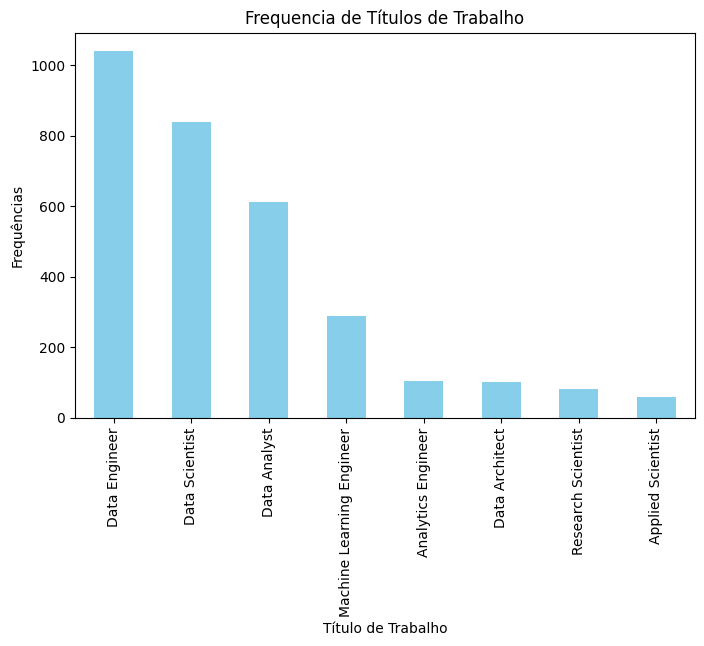

In [96]:
plt.figure(figsize=(8,5))
freqjobtitle.head(8).plot(kind='bar', color='skyblue')
plt.title('Frequencia de Títulos de Trabalho')
plt.xlabel('Título de Trabalho')
plt.ylabel('Frequências')

Text(0, 0.5, 'Frequências')

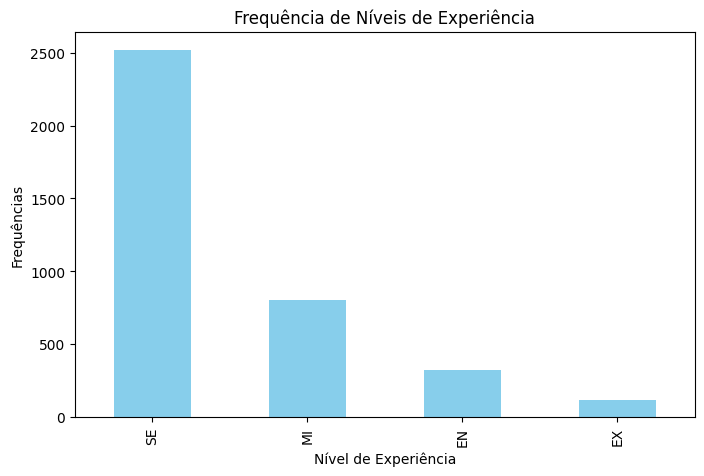

In [97]:
plt.figure(figsize=(8,5))
freqexplvl.plot(kind='bar', color='skyblue')
plt.title('Frequência de Níveis de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Frequências')

Verificando a reincidência dos dados: Tipo de empregado, nível de experiência e Tamanho da empresa. (Em porcentagens)

In [98]:
(df['job_title']).value_counts(normalize=True).head(10) * 100

job_title
Data Engineer                27.696405
Data Scientist               22.370173
Data Analyst                 16.298269
Machine Learning Engineer     7.696405
Analytics Engineer            2.743009
Data Architect                2.689747
Research Scientist            2.183755
Applied Scientist             1.544607
Data Science Manager          1.544607
Research Engineer             0.985353
Name: proportion, dtype: float64

In [99]:
(df['experience_level']).value_counts(normalize=True).head(10) * 100

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [100]:
(df['company_size']).value_counts(normalize=True).head(10) * 100

company_size
M    83.968043
L    12.090546
S     3.941411
Name: proportion, dtype: float64

Retirando a Média, Mediana dos salários de forma geral:

In [101]:
mediasalary = df['salary_in_usd'].mean()
print(f"Media dos salários: USD {mediasalary:.2f}")

Media dos salários: USD 137570.39


In [102]:
medianasalary = df['salary_in_usd'].median()
print(f"Mediana dos salários: USD {medianasalary:.2f}")

Mediana dos salários: USD 135000.00


Desvio Padrão e variancia de todas colunas numéricas.

In [103]:
variancia = df[numericas].var()
print (variancia)

work_year              4.781007e-01
salary_in_usd          3.976012e+09
years_of_experience    4.254618e+00
dtype: float64


In [104]:
desvio_padrao = df[numericas].std()
print(f"Desvio padrão: {desvio_padrao}")

Desvio padrão: work_year                  0.691448
salary_in_usd          63055.625278
years_of_experience        2.062673
dtype: float64


Disperção dos dados

In [105]:
valormin=df['salary_in_usd'].min()
valormax=df['salary_in_usd'].max()
dispercaosal= valormax - valormin
print(f"Menor Salário:  {valormin}")
print(f"Maior Salário:  {valormax}")
print(f"Disperção do Salário:  {dispercaosal}")

Menor Salário:  5132
Maior Salário:  450000
Disperção do Salário:  444868


Analisando relação das médias.

In [119]:
country_sal=df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
experiencenv_sal=df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
print (country_sal)
print (experiencenv_sal)

country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Name: salary_in_usd, dtype: float64
experience_level
EX    194930.929825
SE    153051.071542
MI    104525.939130
EN     78546.284375
Name: salary_in_usd, dtype: float64


Text(0, 0.5, 'Média Salárial')

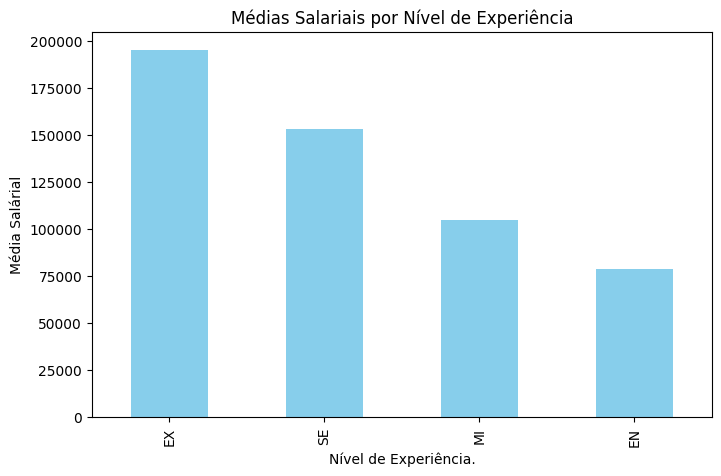

In [120]:
plt.figure(figsize=(8,5))
experiencenv_sal.plot(kind='bar', color='skyblue')
plt.title('Médias Salariais por Nível de Experiência')
plt.xlabel('Nível de Experiência.')
plt.ylabel('Média Salárial')

Text(0, 0.5, 'Média Salárial')

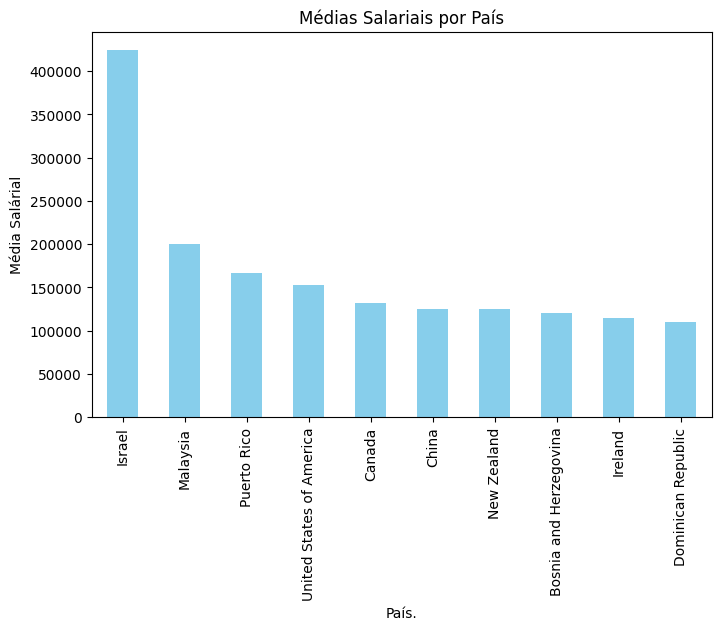

In [122]:
plt.figure(figsize=(8,5))
country_sal.plot(kind='bar', color='skyblue')
plt.title('Médias Salariais por País')
plt.xlabel('País.')
plt.ylabel('Média Salárial')

Gráficos para visualizar a distribuição dos dados

C:\Users\Administrador\AppData\Local\Temp\ipykernel_9924\1404988374.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['salary_in_usd'], labels=['Salário em Dólares'])


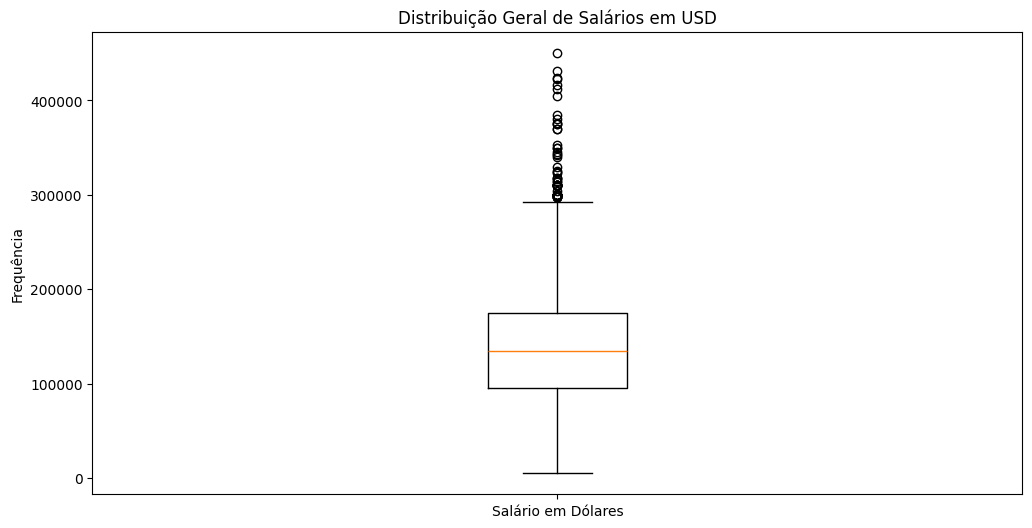

In [109]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['salary_in_usd'], labels=['Salário em Dólares'])
plt.title('Distribuição Geral de Salários em USD')
plt.ylabel('Frequência')
plt.show()